# Chapter 7 Isolation Forest for Anomaly Detection

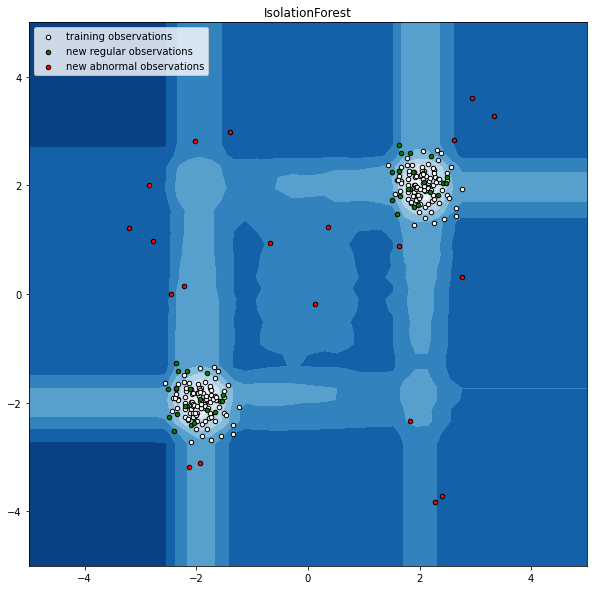

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Seed for reproducibility
np.random.seed(1)

# Generate training data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Fit the model
clf = IsolationForest(max_samples=100, random_state=0)
clf.fit(X_train)

# Predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Create a meshgrid for the plot
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

# Compute the decision function for each point in the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the levels lines and the points
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# plot the line, the samples, and the nearest vectors to the plane
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations",
            "new abnormal observations"],
           loc="upper left")
plt.title("IsolationForest")
plt.show()

# creditcard.csv

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Separate out the features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the model
model = IsolationForest(contamination=0.0017)

# Fit the model to the data
model.fit(X_std)

# Use the model to predict anomalies in the data
y_pred = model.predict(X_std)

# Map the predicted values from {-1,1} to {0,1}
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Add the predictions to the original dataframe
data['Isolation Forest Anomaly Prediction'] = y_pred

# Create a crosstab to view the predicted and actual class distributions
pd.crosstab(data['Class'], data['Isolation Forest Anomaly Prediction'])

Isolation Forest Anomaly Prediction,0,1
Class,,
0,283935,380
1,387,105


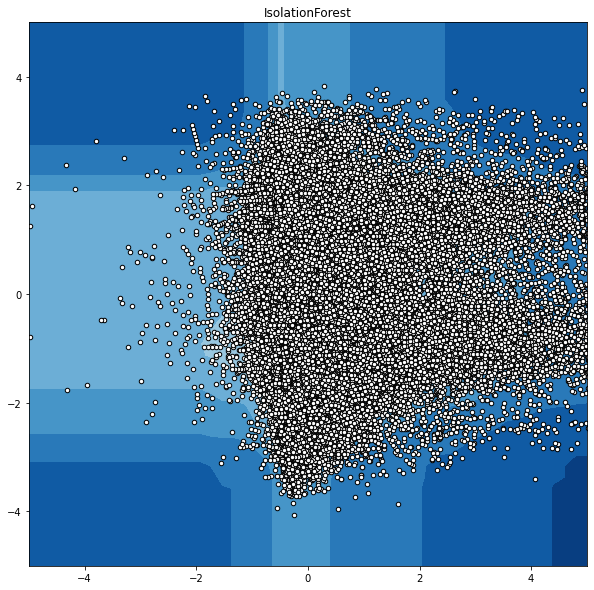

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Fit the model to the PCA-transformed data
clf = IsolationForest(contamination='auto', random_state=0)
clf.fit(X_pca)

# Compute the decision function for each point in the PCA-transformed data
Z = clf.decision_function(X_pca)

# Create a meshgrid for the plot
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the levels lines and the points
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# Plot the data points
b1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c='white', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.title("IsolationForest")
plt.show()